# Geometric art preprocessing
I downloaded hundreds of images from https://penabranca.co/ and manually sifted through them to filter out ones that were not geometric art. Let's standardize them! 

In [1]:
import os
from skimage.io import imread, imsave
from skimage.transform import resize
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
image_paths = ['original/' + filename for filename in os.listdir('original')]
len(image_paths)

252

In [3]:
original = [imread(image_path, as_gray=True) for image_path in tqdm(image_paths)]

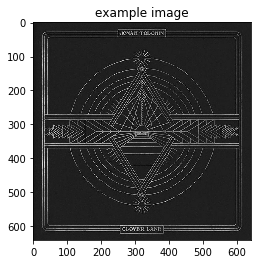

In [4]:
plt.title('example image')
plt.imshow(original[0], cmap='gray')
plt.show()

In [5]:
print(f'smallest image is {min([image.shape for image in original], key=lambda shape: np.prod(shape))}')
print(f'largest image is {max([image.shape for image in original], key=lambda shape: np.prod(shape))}')

smallest image is (320, 320)
largest image is (1350, 1080)


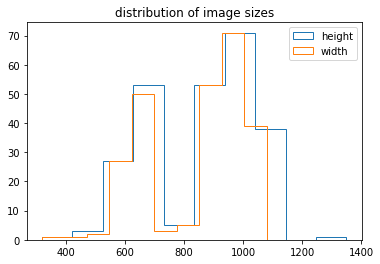

In [6]:
plt.title('distribution of image sizes')
plt.hist([image.shape[0] for image in original], label='height', histtype='step')
plt.hist([image.shape[1] for image in original], label='width', histtype='step')
plt.legend()
plt.show()

These images are pretty large for AI. Let's make them smol!

In [12]:
resized = np.array([resize(image, (128, 128)) for image in tqdm(original)])

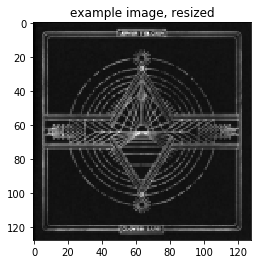

In [17]:
plt.title('example image, resized')
plt.imshow(resized[0], cmap='gray')
plt.show()

That's still pretty big, but smaller was completely illegible.

In [18]:
np.save('processed.npy', resized)